In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f = uproot.open('data/stage2.pbp.eh1.7ad.root')

In [3]:
f.keys()

['h_single_AD2;1',
 'h_ibd_AD2;1',
 'h_ibd_delayed_AD2;1',
 'h_ibd_AD2_low;1',
 'h_ibd_delayed_AD2_low;1',
 'h_ncap_ad2;1',
 'results;1',
 'ibd_AD2;1']

In [4]:
f['ibd_AD2']

<TTree 'ibd_AD2' (13 branches) at 0x7caff994f940>

In [5]:
tree = f['ibd_AD2']

In [6]:
awk = tree.arrays()

In [7]:
awk

<Array [{runNo: 72508, fileNo: 2, ...}, ...] type='551789 * {runNo: uint32,...'>

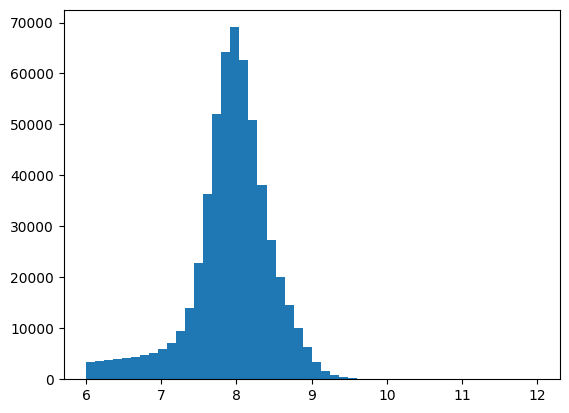

In [8]:
plt.hist(awk['eD'], bins=50);

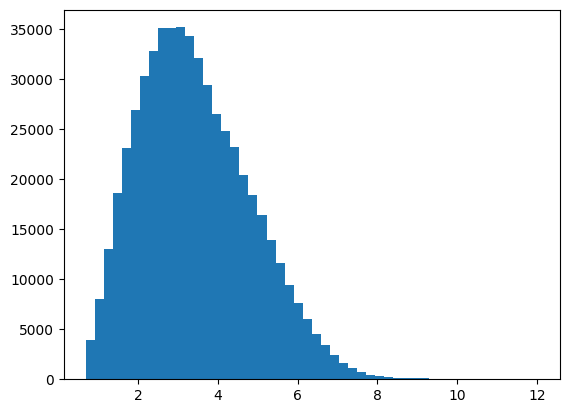

In [9]:
plt.hist(awk['eP'], bins=50);

In [10]:
m_p = 938.27
m_n = 939.57
m_e = 0.511

In [11]:
def e_prompt(e_nu):
    return e_nu - (m_n - m_p) + m_e

In [12]:
e_prompt(2)

1.210999999999932

In [13]:
2 - 1.2

0.8

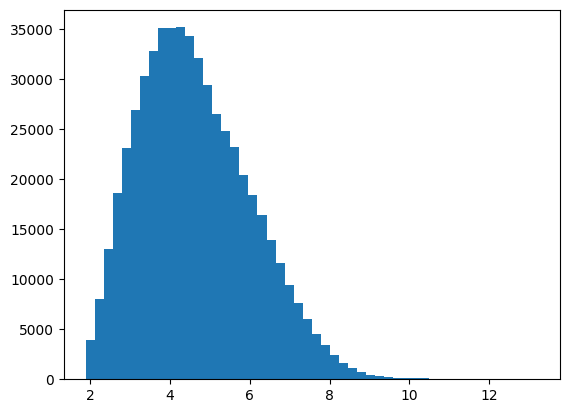

In [14]:
plt.hist(awk['eP'] + 1.2, bins=50);

In [15]:
events = awk

In [16]:
top_events = events[events['zP'] > 0]

In [17]:
bottom_events = events[events['zP'] < 0]

In [18]:
bins = np.linspace(0, 12, 2*12+1)

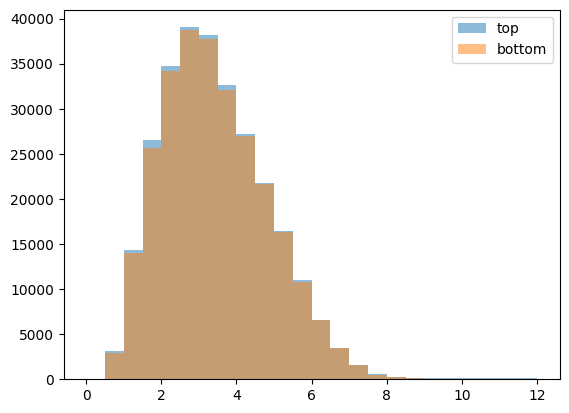

In [19]:
plt.hist(top_events['eP'], alpha=0.5, bins=bins, label='top')
plt.hist(bottom_events['eP'], alpha=0.5, bins=bins, label='bottom')
plt.legend()

In [20]:
h_top, bins_ = np.histogram(top_events['eP'], bins=bins)

In [21]:
h_bottom, bins_ = np.histogram(bottom_events['eP'], bins=bins)

In [22]:
h_diff = h_top - h_bottom

In [23]:
bin_centers = (bins[1:] + bins[:-1]) / 2

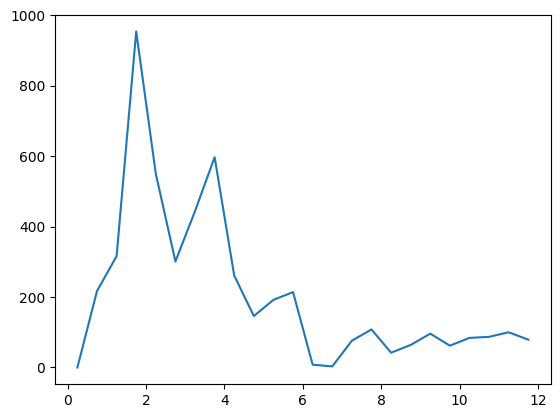

In [24]:
plt.plot(bin_centers, h_diff)

In [25]:
np.sum(h_diff)

np.float64(5001.0)

In [26]:
len(events)

551789

In [27]:
np.sqrt(551789)

np.float64(742.8250130414295)